In [ ]:
import tensorflow as tf
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.models import model_from_json

import external as ext

In [2]:
HEIGHT = 75
WIDTH = 75
DEPTH = 3
BATCH_SIZE = 64
EPOCHS = 250
SEED = 7

In [4]:
image_data = ext.getImageData(
    train_dir = "./train", val_dir = "./val", test_dir = "./test"
).loadImageData(
    HEIGHT, WIDTH, DEPTH, BATCH_SIZE, SEED
)
NUM_OUTPUTS = len(image_data['train'].class_indices)

Training data:
Found 13625 images belonging to 6 classes.
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Image batch shape: (64, 75, 75, 3)
Image labels shape: (64,)

Validation data:
Found 1703 images belonging to 6 classes.
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Image batch shape: (64, 75, 75, 3)
Image labels shape: (64,)

Testing data:
Found 1706 images belonging to 6 classes.
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Image batch shape: (64, 75, 75, 3)
Image labels shape: (64,)



In [8]:
model = ext.customModel(
    HEIGHT, WIDTH, DEPTH
).buildModel(
    NUM_OUTPUTS,
    optimiser = "Nadam",
    loss_metric = SparseCategoricalCrossentropy(
        from_logits=False)
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 38, 38, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 38, 38, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 128)      0         
 2D)                                                    

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience = 10, verbose=1),
    ModelCheckpoint(
        './chk_mdl_wts.hdf5',
        save_best_only=True,
        monitor='val_Accuracy',
        mode='max'
      ),
    # ReduceLROnPlateau(factor = 0.1, patience = 8)
]
history = model.fit(
    image_data['train'],
    validation_data=image_data['val'],
    epochs=EPOCHS,
    batch_size=BATCH_SIZE, 
    callbacks=callbacks
)
model.load_weights("./chk_mdl_wts.hdf5")

In [ ]:
ext.save_model(
    model,
    "./",
    "multiclass_image_classification"
)

In [ ]:
ext.visualise_performance(history)

In [10]:
model = ext.load_model(
    save_dir = "./", model_name = "multiclass_image_classification"
)
model.compile(
    optimizer = "Nadam",
    loss = SparseCategoricalCrossentropy(
        from_logits=False),
    metrics='Accuracy'
)
model.evaluate(image_data['test'])

Loading Precomputed Model
Loaded model from disk
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 38, 38, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 38, 38, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 128)      0         
 2D)   

[0.39187848567962646, 0.8710433840751648]

27/27 [==============================] - 12s 440ms/step
['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


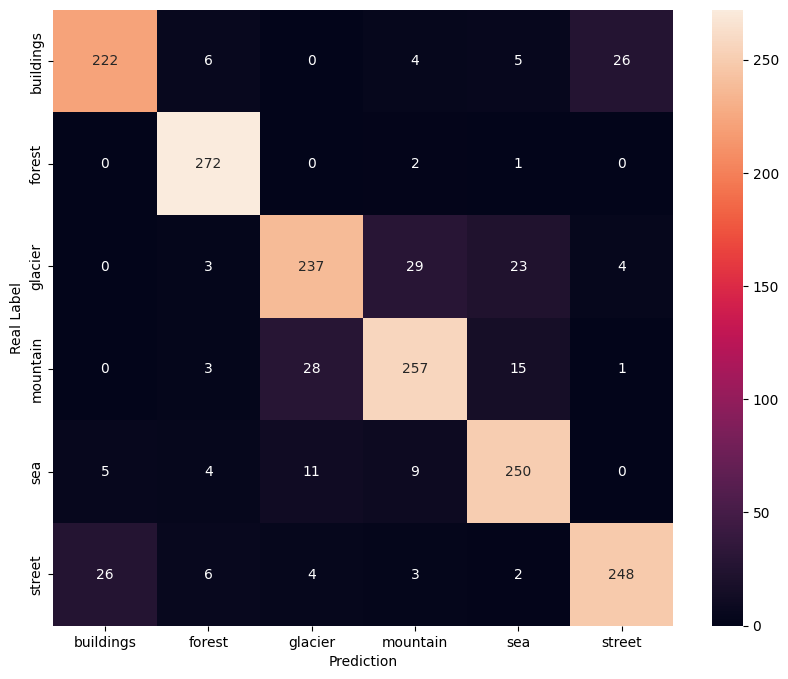

In [11]:
ext.model_accuracy(
    model,
    image_data['test']
)